
---

# **Project Overview: Student Depression Prediction Using Machine Learning**

This project aims to **analyze and predict depression levels among students** using a combination of **Exploratory Data Analysis (EDA)** and **Machine Learning models**. With rising academic pressure, lifestyle challenges, and mental health concerns among students, this project provides an analytical approach to identifying patterns that may help in early detection.

---

## **Objectives**

1. **Understand the dataset** through EDA and uncover key trends affecting student mental health.
2. **Preprocess the data** by handling missing values, encoding categorical variables, and scaling numerical features.
3. **Build multiple ML models** (Logistic Regression, KNN, Random Forest, SVM) to classify students as:

   * **Depressed**
   * **Not Depressed**
4. **Evaluate model performance** using accuracy, confusion matrices, precision, recall, and F1-score.
5. **Select and save the best-performing model** for deployment.
6. **Deploy the final solution** as an interactive **Streamlit web application**.

---

## **Dataset Description**

The dataset contains information related to:

* **Demographics** (Age, Gender, City, Degree)
* **Academic factors** (Academic Pressure, CGPA, Study Satisfaction)
* **Lifestyle & habits** (Sleep Duration, Dietary Habits)
* **Work/Study behavior** (Work Pressure, Weekly Hours)
* **Mental health indicators** (Suicidal thoughts, Family history)

The target variable indicates **whether the student suffers from depression (1) or not (0)**.

---

## **Methodology**

1. **Data Cleaning & Preprocessing**

   * Handling missing values
   * Encoding categorical variables using *OneHotEncoder*
   * Scaling numerical variables using *StandardScaler*
   * Building a reusable **preprocessing pipeline**

2. **Exploratory Data Analysis (EDA)**

   * Distribution analysis of key features
   * Correlation heatmaps
   * Outlier detection
   * Understanding relationships between academic pressure, sleep, CGPA, and depression

3. **Model Training**

   * Logistic Regression
   * KNN
   * Random Forest
   * SVM
     Each model was trained with the same preprocessed data for fair comparison.

4. **Model Evaluation**

   * Accuracy
   * Confusion Matrix
   * Precision, Recall, F1-score
   * Feature importance (for tree-based models)

5. **Model Selection & Saving**

   * Best model identified based on accuracy and balanced metrics
   * Models and preprocessing pipeline saved as `.pkl` files

6. **Deployment**

   * Streamlit app built for user inputs
   * Model loaded to generate real-time predictions
   * App interface designed for simplicity and clarity

---

## **Outcome**

The final result is a **fully functioning ML-powered web application** capable of predicting whether a student might be experiencing depression based on their attributes.
This project demonstrates:

* Full ML workflow
* Integration of EDA + ML + Deployment
* Real-world applicability in mental health analytics

---

## **Next Steps / Possible Improvements**

* Add model explainability (SHAP values)
* Hyperparameter tuning for improved accuracy
* Deploy to Streamlit Cloud
* Add API endpoints for external integrations
* Improve UI/UX for wider usage

--

In [4]:
# Import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report





# Load the dataset
data = pd.read_csv("student_depression_dataset.csv")

# Display the first few rows
data.head()

# Display summary statistics
data.describe()
data.info()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

**Clean text-based (categorical) columns**

Some columns like 'Sleep Duration' have quotes or inconsistent casing.The following code will:

- Remove stray ' characters (e.g., '5-6 hours' → 5-6 Hours)

- Remove leading/trailing spaces

- Standardize text case (e.g., “yes” → “Yes”)

In [5]:
# Clean the text-based columns (categorical columns)
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.replace("'", "").str.strip().str.title()


data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 Hours,Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 Hours,Moderate,Bsc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less Than 5 Hours,Healthy,Ba,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 Hours,Moderate,Bca,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 Hours,Moderate,M.Tech,Yes,1,1,No,0


**Verify unique values in categorical columns**

In [6]:
for col in data.select_dtypes(include='object').columns:
    print(f"\n{col} → {data[col].unique()}")



Gender → ['Male' 'Female']

City → ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3'
 'Less Than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'Me' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']

Profession → ['Student' 'Civil Engineer' 'Architect' 'Ux/Ui Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']

Sleep Duration → ['5-6 Hours' 'Less Than 5 Hours' '7-8 Hours' 'More Than 8 Hours' 'Others']

Dietary Habits → ['Healthy' 'Moderate' 'Unhealthy' 'Others']

Degree → ['B.Pharm' 'Bsc' 'Ba' 'Bca' 'M.Tech' 'Phd' 'Class 12' 'B.Ed' 'Llb' 'Be'
 'M.Ed' 

**Drop the identifier column**

In [7]:
data = data.drop(columns=['id'])
data.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 Hours,Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 Hours,Moderate,Bsc,No,3,2,Yes,0
2,Male,31,Srinagar,Student,3,0,7.03,5,0,Less Than 5 Hours,Healthy,Ba,No,9,1,Yes,0
3,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 Hours,Moderate,Bca,Yes,4,5,Yes,1
4,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 Hours,Moderate,M.Tech,Yes,1,1,No,0


**Convert categorical yes/no fields to binary** 

In [8]:
binary_map = {'Yes': 1, 'No': 0}
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].map(binary_map)
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map(binary_map)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  int64  
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  int64  
 5   Work Pressure                          27901 non-null  int64  
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  int64  
 8   Job Satisfaction                       27901 non-null  int64  
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

## EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
# Data overview
# Basic info
data.info()

# Summary statistics for numerical columns
data.describe()

# Check the shape
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  int64  
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  int64  
 5   Work Pressure                          27901 non-null  int64  
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  int64  
 8   Job Satisfaction                       27901 non-null  int64  
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

**Target Variable Distribution (Depression)**

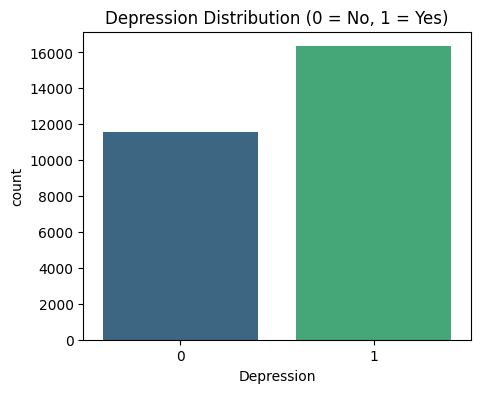

Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64

In [10]:


plt.figure(figsize=(5,4))
sns.countplot(x='Depression', data=data, palette='viridis')
plt.title("Depression Distribution (0 = No, 1 = Yes)")
plt.show()

data['Depression'].value_counts(normalize=True)


**Observation**

- From the plot,we can conclude that thre is a slight imbalance between the +ve and -ve cases with a difference of 18% (positive cases are at ~59% while the negatives are at ~41%)

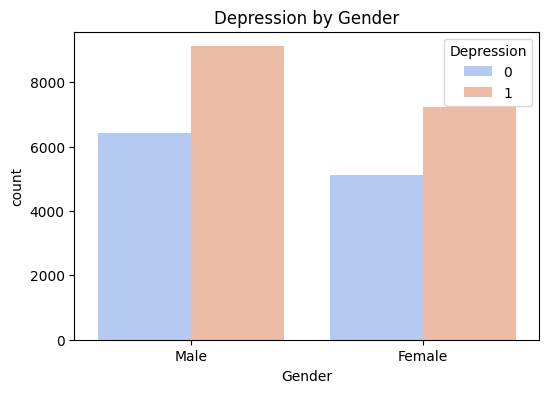

In [11]:
#Gender and Depression
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Depression', data=data, palette='coolwarm')
plt.title("Depression by Gender")
plt.show()


**Observation**

Depression is more frequently recorded than non-depression for both genders.

Males appear to have a slightly higher count of depression cases than females, although this may reflect dataset composition rather than a real-world trend.

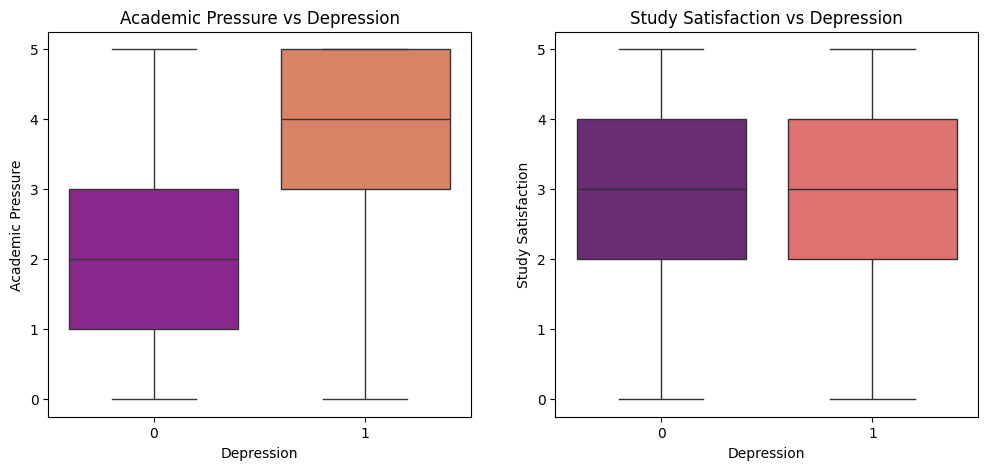

In [12]:
#Academic pressure,study satisfaction and Depression
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x='Depression', y='Academic Pressure', data=data, ax=axes[0], palette='plasma')
axes[0].set_title('Academic Pressure vs Depression')

sns.boxplot(x='Depression', y='Study Satisfaction', data=data, ax=axes[1], palette='magma')
axes[1].set_title('Study Satisfaction vs Depression')
plt.show()


**Observation**

- Students with depression report significantly higher academic pressure than those without depression.
This is a strong visual indicator that higher academic pressure may be associated with increased rates of depression in this dataset.
- Study satisfaction does not differ much between the depressed and non-depressed groups.
There is a slight tendency for depressed students to have lower satisfaction, but the overlap is large.

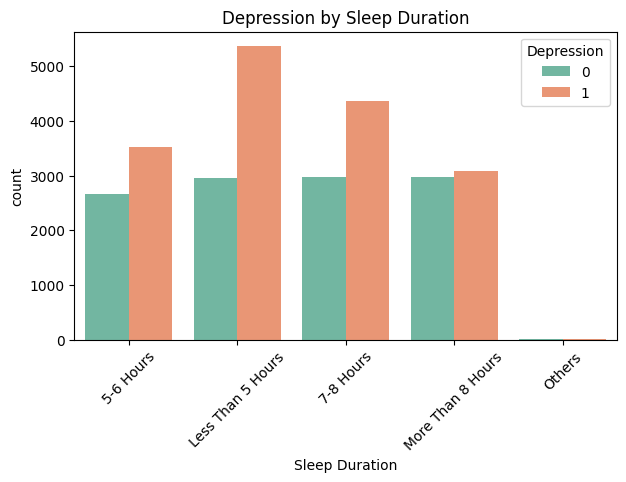

In [13]:
#sleep duration and Depression
plt.figure(figsize=(7,4))
sns.countplot(x='Sleep Duration', hue='Depression', data=data, palette='Set2')
plt.title("Depression by Sleep Duration")
plt.xticks(rotation=45)
plt.show()


**Observation**

Short sleep duration is strongly associated with higher depression levels

Especially <5 hours, where depression counts nearly double the non-depressed group.

5–6 hours also shows a noticeable increase.

2. Adequate or longer sleep appears protective

In the 7–8 hour and >8 hour groups, depression is still present but less pronounced.

The >8 hours group is the closest to balanced.

3. Possible overall pattern

The less sleep people get, the higher their likelihood of depression.


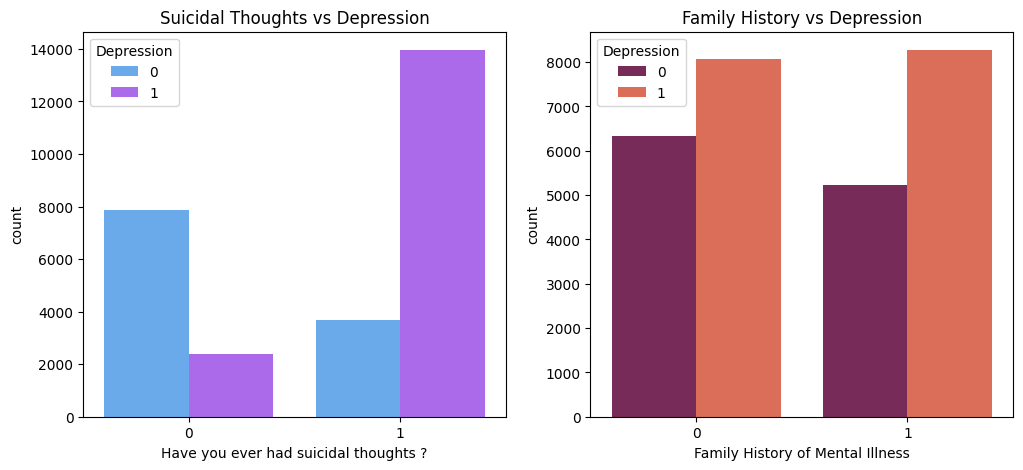

In [14]:
#suicidal thoughts,family history and Depression
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=data, ax=axes[0], palette='cool')
axes[0].set_title('Suicidal Thoughts vs Depression')

sns.countplot(x='Family History of Mental Illness', hue='Depression', data=data, ax=axes[1], palette='rocket')
axes[1].set_title('Family History vs Depression')
plt.show()


**Observation**

- The data shows a strong association between suicidal thoughts and depression, where individuals who have experienced suicidal thoughts are overwhelmingly more likely to be depressed. This makes suicidal thoughts one of the most powerful predictors in the dataset.

- Family history of mental illness also shows a positive association with depression, though the effect is less pronounced. Individuals with a family history exhibit higher depression rates compared to those without, suggesting a genetic or environmental influence.”

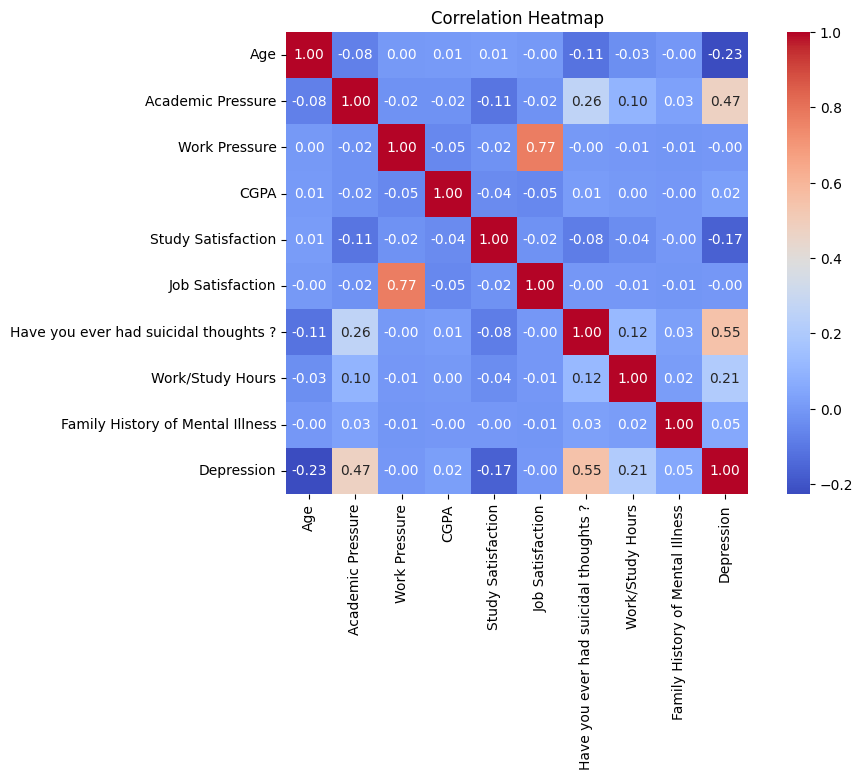

In [15]:
#correalation heatmap for numerical features
plt.figure(figsize=(10,6))
corr = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


**Observation**
- The heatmap shows that suicidal thoughts and academic pressure are the strongest predictors of depression, with correlations of 0.55 and 0.47 respectively. Age and study satisfaction show moderate negative relationships, indicating that older and more academically satisfied students are less likely to be depressed. Other variables like CGPA, job satisfaction, and work pressure show weak or negligible correlations, suggesting they are not strong direct influencers of depression in this dataset

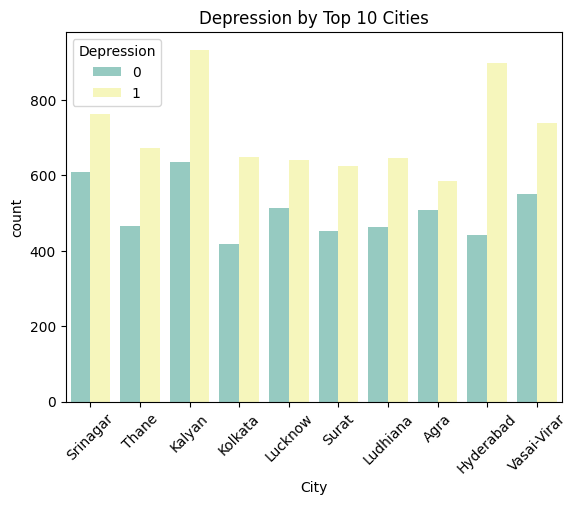

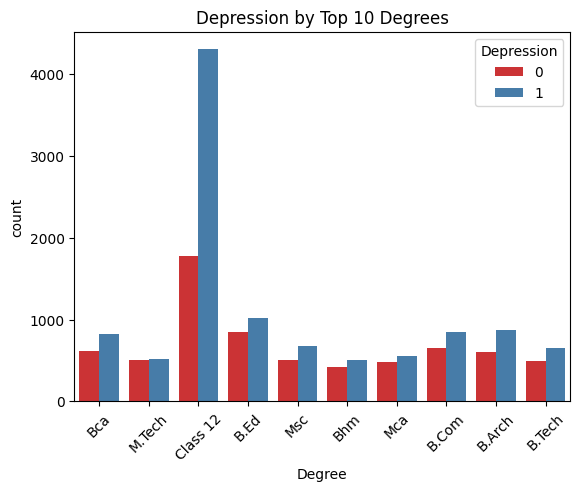

In [16]:
#city or degree breakdown
top_cities = data['City'].value_counts().nlargest(10).index
sns.countplot(x='City', hue='Depression', data=data[data['City'].isin(top_cities)], palette='Set3')
plt.title("Depression by Top 10 Cities")
plt.xticks(rotation=45)
plt.show()
top_degrees = data['Degree'].value_counts().nlargest(10).index
sns.countplot(x='Degree', hue='Depression', data=data[data['Degree'].isin(top_degrees)], palette='Set1',)
plt.title("Depression by Top 10 Degrees")
plt.xticks(rotation=45)
plt.show()

## Summary Observations
From the visuals,we can observe that:

- Depression in students can be caused by presence of certain factors more than their absence ,e.g,academic pressure.
- Others like mental illness in the family and study satisfaction barely has no effect,i.e,you can be satisfied by your studies but still be depressed ;presence of mental illness in the family does not equate to one being depressed.

### DATA PREPROCESSING FOR MODELING

The main goals are to:

- Handle categorical variables

- Scale numeric columns

- Split the dataset into training and testing sets

In [17]:
# Separate the target (Depression) from features
X = data.drop(columns=['Depression'])              #holding all columns except 'Depression'(features)
y = data['Depression']                             #holding only 'Depression' column(target variable)
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("="*60)

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include='object').columns  #selecting only object type columns(categorical columns)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns #selecting only int and float type columns(numeric columns)

print("Categorical columns:", list(categorical_cols))
print("Numeric columns:", list(numeric_cols))

# Preprocessing using ColumnTransformer-lets you apply transformations to specific column types.
# Define transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)                                                      
 #stratify=y ensures that the target variable distribution is maintained in both sets

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


# Fit the preprocessor on the training data and transform both sets
X_train_prep = preprocessor.fit_transform(X_train)  #fitting and transforming training data
X_test_prep = preprocessor.transform(X_test)        #transforming test data

print("After preprocessing:")
print("X_train_prep shape:", X_train_prep.shape)
print("X_test_prep shape:", X_test_prep.shape)



Features shape: (27901, 16)
Target shape: (27901,)
Categorical columns: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Financial Stress']
Numeric columns: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Family History of Mental Illness']
Training set: (22320, 16)
Test set: (5581, 16)
After preprocessing:
X_train_prep shape: (22320, 107)
X_test_prep shape: (5581, 107)


### Model Building and Evaluation phase

where we’ll:

- Train Logistic Regression, Random Forest, KNN, and SVM

We selected these four models to represent different machine learning paradigms — linear (Logistic Regression), instance-based (KNN), ensemble (Random Forest), and margin-based (SVM). This diversity allows us to compare how various learning approaches perform on predicting student depression."

- Compare their accuracy, F1, and ROC-AUC

- Visualize model performance

In [18]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),   #max_iter 1000 to ensure convergence in Logistic Regression
    "KNN": KNeighborsClassifier(n_neighbors=5),                 #n_neighbors= 5 is KNN default parameter
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), #n_estimators=100 means 100 trees in the forest, random_state=42 for reproducibility
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)  #rbf kernel is default, probability=True to enable probability estimates, random_state=42 for reproducibility
}


In [19]:
# Train and evaluate each model
results = {}
trained_models = {}   # NEW → store trained model objects

for name, model in models.items():
    model.fit(X_train_prep, y_train)                     
    y_pred = model.predict(X_test_prep)

    # save trained model
    trained_models[name] = model

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, zero_division=0)

    print("="*60)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)

    
    

Model: Logistic Regression
Accuracy: 0.8427
Confusion Matrix:
 [[1836  477]
 [ 401 2867]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581

Model: KNN
Accuracy: 0.8201
Confusion Matrix:
 [[1746  567]
 [ 437 2831]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78      2313
           1       0.83      0.87      0.85      3268

    accuracy                           0.82      5581
   macro avg       0.82      0.81      0.81      5581
weighted avg       0.82      0.82      0.82      5581

Model: Random Forest
Accuracy: 0.8377
Confusion Matrix:
 [[1803  510]
 [ 396 2872]]
Classification Report:
               precision   

In [20]:
#identify the best model
# Determine the best model based on accuracy
best_model_name = None
best_accuracy = 0

for name, model in trained_models.items():
    # get predictions
    y_pred = model.predict(X_test_prep)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {acc:.4f}")
    
    # check if this model is better
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name

print("\n======================================")
print(f" Best Model: {best_model_name}")
print(f" Accuracy: {best_accuracy:.4f}")
print("======================================")



Logistic Regression Accuracy: 0.8427
KNN Accuracy: 0.8201
Random Forest Accuracy: 0.8377
SVM Accuracy: 0.8438

 Best Model: SVM
 Accuracy: 0.8438


### Model Insights
- All four models achieved good predictive performance (82–84%).
The SVM classifier slightly outperformed the others, achieving the highest accuracy (0.8438) and best recall (0.89) for detecting depressed students. This makes SVM the most suitable model for early depression detection.

- Logistic Regression also performed strongly and closely matched SVM, offering better interpretability, which is valuable for understanding risk factors.

- Random Forest delivered robust results and is useful for identifying feature importance, while KNN performed the weakest due to sensitivity to high-dimensional data.

Overall, the models are better at identifying depressed students than non-depressed ones, suggesting stronger signals and clearer patterns associated with depression indicators in the dataset.

### Feature Importance
- Feature importance helps us understand which variables contribute the most to predicting student depression.

                                        Feature  Importance
104  num__Have you ever had suicidal thoughts ?    0.200019
99                       num__Academic Pressure    0.150412
98                                     num__Age    0.072297
101                                   num__CGPA    0.068399
105                       num__Work/Study Hours    0.063635


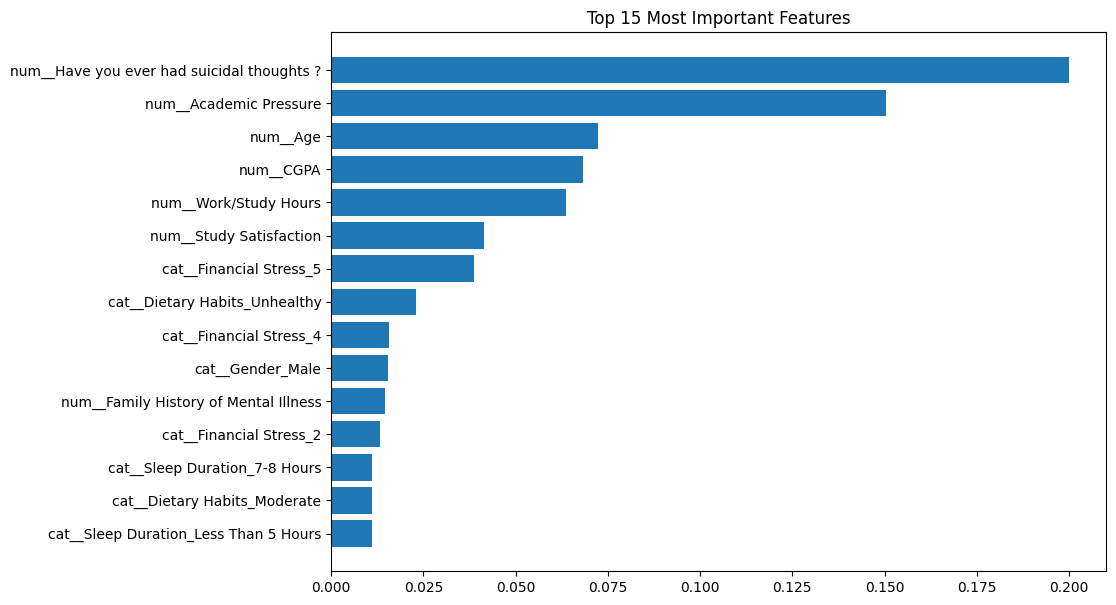

In [21]:
#Random Forest Feature Importance
# Get feature names after one-hot encoding
feature_names = preprocessor.get_feature_names_out()

rf = models["Random Forest"]

importances = rf.feature_importances_

# Put into a dataframe
import pandas as pd
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(fi_df.head())

#plot feature importance
plt.figure(figsize=(10, 7))
plt.barh(fi_df["Feature"][:15], fi_df["Importance"][:15])
plt.title("Top 15 Most Important Features")
plt.gca().invert_yaxis()
plt.show()



In [22]:
#logistic regression feature coefficients
lr = models["Logistic Regression"]

coef = lr.coef_[0]

lr_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coef
}).sort_values(by="Coefficient", ascending=False)

print(lr_df.head(20))


                                        Feature  Coefficient
96                      cat__Financial Stress_5     2.235387
95                      cat__Financial Stress_4     1.571610
104  num__Have you ever had suicidal thoughts ?     1.211381
99                       num__Academic Pressure     1.166442
94                      cat__Financial Stress_3     1.132678
65                cat__Dietary Habits_Unhealthy     1.085880
64                   cat__Dietary Habits_Others     0.850222
51                       cat__Profession_Doctor     0.511370
63                 cat__Dietary Habits_Moderate     0.482307
97                      cat__Financial Stress_?     0.463369
39                             cat__City_Saanvi     0.440115
105                       num__Work/Study Hours     0.438077
7                                cat__City_City     0.428640
93                      cat__Financial Stress_2     0.413862
60        cat__Sleep Duration_Less Than 5 Hours     0.350562
4                       

**feature importance conlusion**
- SVM and KNN has no feature importance but uses permutation importance
- In logistic regression uses coefficients direction and magnitude;

         - Positive coefficient → feature increases likelihood of depression

         - Negative coefficient → feature reduces likelihood

         - Values near zero → weak impact

- In Random Forest,ranking helps identify the 'top drivers' of depression

**Preparing To Deploy The Models To Streamlit**

In [23]:
import pickle

for name, model in trained_models.items():
    filename = name.replace(" ", "_").lower() + ".pkl"
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    
    print(f"Saved model as {filename}")


Saved model as logistic_regression.pkl
Saved model as knn.pkl
Saved model as random_forest.pkl
Saved model as svm.pkl


In [24]:
pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))
#Streamlit needs it to transform user input the same way the model was trained.

In [25]:
import pickle, os
files = ["preprocessor.pkl","logistic_regression.pkl","knn.pkl","random_forest.pkl","svm.pkl"]
for f in files:
    print(f, "exists?", os.path.exists(f))
    if os.path.exists(f):
        with open(f,"rb") as fh:
            obj = pickle.load(fh)
            print("  Loaded:", type(obj))

#this code loads and verifies the saved models and preprocessor

preprocessor.pkl exists? True
  Loaded: <class 'sklearn.compose._column_transformer.ColumnTransformer'>
logistic_regression.pkl exists? True
  Loaded: <class 'sklearn.linear_model._logistic.LogisticRegression'>
knn.pkl exists? True
  Loaded: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
random_forest.pkl exists? True
  Loaded: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
svm.pkl exists? True
  Loaded: <class 'sklearn.svm._classes.SVC'>


In [26]:
categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)


Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Financial Stress'],
      dtype='object')


In [27]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)


Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Family History of Mental Illness'],
      dtype='object')
